# SIRV

7
All tests passed!


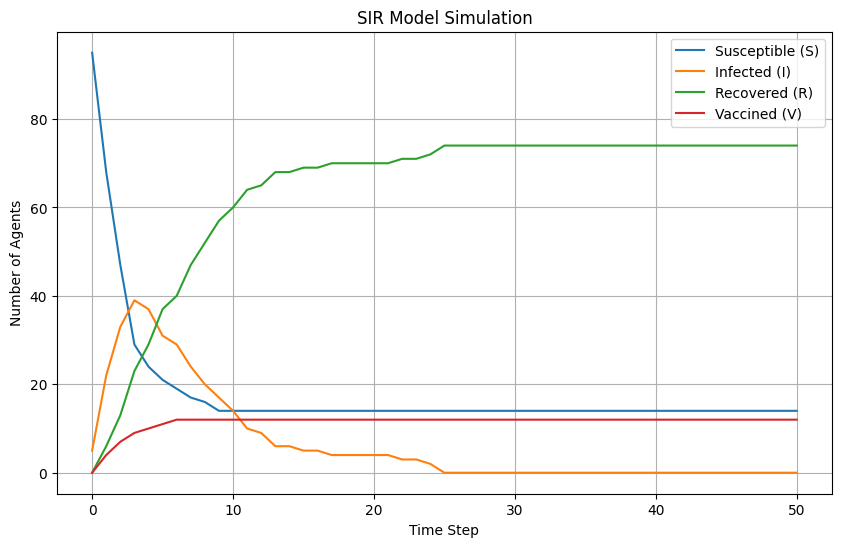

In [7]:
from src.back.models.sir_model import SIRModel
import matplotlib.pyplot as plt

def run_simulation(
    num_nodes=100,                          # Tamaño total de la población (100 nodos)
    avg_node_degree=5,                      # Conexiones promedio por nodo (contactos cercanos)
    initial_outbreak_size=5,                # Número de agentes inicialmente infectados
    virus_spread_chance=0.3,               # Probabilidad de que un infectado contagie a un susceptible
    virus_check_frequency=1.0,              # Frecuencia con la que los infectados intentan contagiar
    recovery_chance=0.2,                   # Probabilidad diaria de recuperación
    gain_resistance_chance=0.6,             # Probabilidad de ganar inmunidad tras la recuperación
    seed=42,                                # Semilla para reproducibilidad
    steps=100,                              # Duración de la simulación en días
    vaccination_chance=0.05,
    vaccination_method="Most Popular"
):
    # Initialize the model
    model = SIRModel(
        num_nodes=num_nodes,
        avg_node_degree=avg_node_degree,
        initial_outbreak_size=initial_outbreak_size,
        virus_spread_chance=virus_spread_chance,
        virus_check_frequency=virus_check_frequency,
        recovery_chance=recovery_chance,
        gain_resistance_chance=gain_resistance_chance,
        seed=seed,
        vaccination_chance=vaccination_chance,
        vaccination_strategy=vaccination_method
    )

    # Run the simulation for the specified number of steps
    for _ in range(steps):
        model.step()

    # Collect the data
    return model.datacollector.get_model_vars_dataframe()


def plot_simulation_results(data):
    """
    Plot the results of the SIR model simulation.

    Args:
        data: Dataframe containing the simulation results.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data["Susceptible"], label="Susceptible (S)")
    plt.plot(data["Infected"], label="Infected (I)")
    plt.plot(data["Recovered"], label="Recovered (R)")
    plt.plot(data["Vaccined"], label="Vaccined (V)")
    plt.xlabel("Time Step")
    plt.ylabel("Number of Agents")
    plt.title("SIR Model Simulation")
    plt.legend()
    plt.grid(True)
    plt.show()


def test_simulation():
    """
    Test the SIR model simulation for basic correctness.
    """
    data = run_simulation()

    # Basic assertions to ensure the simulation is working as expected
    assert not data.empty, "Simulation produced no data"
    assert data["Infected"].max() > 0, "No infections occurred"
    assert data["Recovered"].max() >= 0, "Resistance values are invalid"
    assert data["Susceptible"].min() >= 0, "Negative susceptible values found"
    print(data["Vaccined"][2])
    print("All tests passed!")


# Run the simulation and tests
test_simulation()
results = run_simulation(steps=50)
plot_simulation_results(results)

# SIRSV

All tests passed!


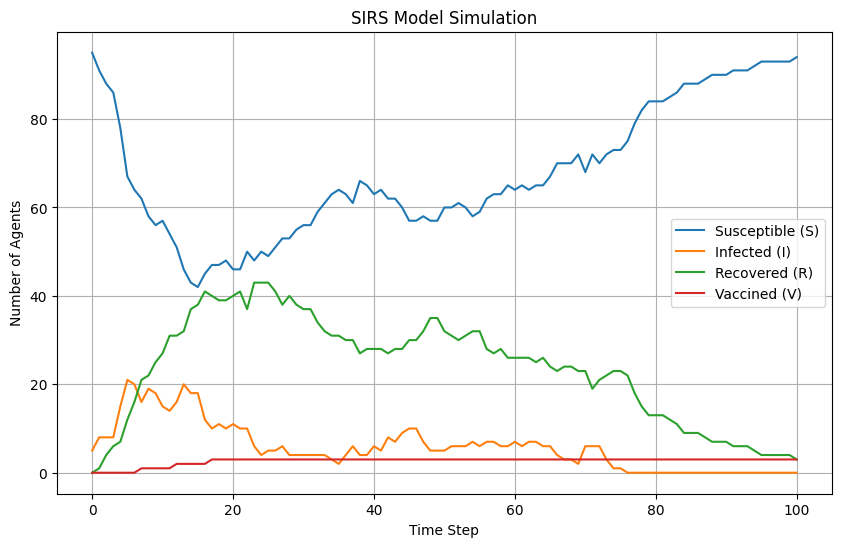

In [1]:
from src.back.models.sirs_model import SIRSModel
import matplotlib.pyplot as plt

def run_sirsv_simulation(
    num_nodes=100,
    avg_node_degree=5,
    initial_outbreak_size=5,
    virus_spread_chance=0.1,
    virus_check_frequency=1.0,
    recovery_chance=0.2,
    gain_resistance_chance=0.6,
    immunity_loss_chance=0.05,
    seed=56,
    steps=100,
    vaccination_chance=0.05,
    vaccination_method="Most Popular"
):
    """
    Run a simulation of the SIRSV model.

    Args:
        All parameters correspond to the SIRSVModel initialization.

    Returns:
        Dataframe containing the simulation results.
    """
    # Initialize the model
    model = SIRSModel(
        num_nodes=num_nodes,
        avg_node_degree=avg_node_degree,
        initial_outbreak_size=initial_outbreak_size,
        virus_spread_chance=virus_spread_chance,
        virus_check_frequency=virus_check_frequency,
        recovery_chance=recovery_chance,
        gain_resistance_chance=gain_resistance_chance,
        immunity_loss_chance=immunity_loss_chance,
        seed=seed,
        vaccination_strategy=vaccination_method,
        vaccination_chance=vaccination_chance
        )

    # Run the simulation for the specified number of steps
    for _ in range(steps):
        model.step()

    # Collect the data
    return model.datacollector.get_model_vars_dataframe()

def plot_sirsv_results(data):
    """
    Plot the results of the SIRSV model simulation.

    Args:
        data: Dataframe containing the simulation results.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data["Susceptible"], label="Susceptible (S)")
    plt.plot(data["Infected"], label="Infected (I)")
    plt.plot(data["Recovered"], label="Recovered (R)")
    plt.plot(data["Vaccined"], label="Vaccined (V)")
    plt.xlabel("Time Step")
    plt.ylabel("Number of Agents")
    plt.title("SIRS Model Simulation")
    plt.legend()
    plt.grid(True)
    plt.show()

def test_sirsv_simulation():
    """
    Test the SIRSV model simulation for basic correctness.
    """
    data = run_sirsv_simulation()

    # Basic assertions to ensure the simulation is working as expected
    assert not data.empty, "Simulation produced no data"
    assert data["Infected"].max() > 0, "No infections occurred"
    assert data["Recovered"].max() >= 0, "Resistance values are invalid"
    assert data["Susceptible"].min() >= 0, "Negative susceptible values found"

    print("All tests passed!")

# Run the test and plot the results
test_sirsv_simulation()
results = run_sirsv_simulation(steps=100)
plot_sirsv_results(results)


All tests passed!


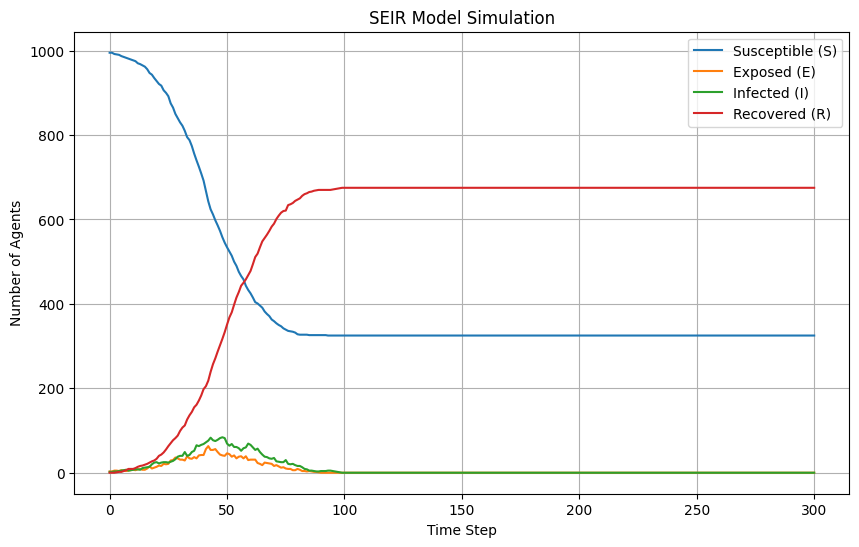

In [1]:
from src.back.models.seir_model import SEIRModel
import matplotlib.pyplot as plt

def run_seirv_simulation(
    num_nodes=1000,
    avg_node_degree=5,
    initial_exposed_size=3,
    initial_infected_size=2,
    virus_spread_chance=0.1,
    virus_check_frequency=1.0,
    exposure_to_infection_chance=0.3,
    recovery_chance=0.2,
    gain_resistance_chance=0.8,
    seed=120,
    steps=50,

):
    """
    Run a simulation of the SEIRV model.

    Args:
        All parameters correspond to the SEIRVModel initialization.

    Returns:
        Dataframe containing the simulation results.
    """
    # Initialize the model
    model = SEIRModel(
        num_nodes=num_nodes,
        avg_node_degree=avg_node_degree,
        initial_exposed_size=initial_exposed_size,
        initial_infected_size=initial_infected_size,
        virus_spread_chance=virus_spread_chance,
        virus_check_frequency=virus_check_frequency,
        exposure_to_infection_chance=exposure_to_infection_chance,
        recovery_chance=recovery_chance,
        gain_resistance_chance=gain_resistance_chance,
        seed=seed,
    )

    # Run the simulation for the specified number of steps
    for _ in range(steps):
        model.step()

    # Collect the data
    return model.datacollector.get_model_vars_dataframe()

def plot_seirv_results(data):
    """
    Plot the results of the SEIRV model simulation.

    Args:
        data: Dataframe containing the simulation results.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data["Susceptible"], label="Susceptible (S)")
    plt.plot(data["Exposed"], label="Exposed (E)")
    plt.plot(data["Infected"], label="Infected (I)")
    plt.plot(data["Recovered"], label="Recovered (R)")
    plt.xlabel("Time Step")
    plt.ylabel("Number of Agents")
    plt.title("SEIR Model Simulation")
    plt.legend()
    plt.grid(True)
    plt.show()

def test_seirv_simulation():
    """
    Test the SEIR model simulation for basic correctness.
    """
    data = run_seirv_simulation()

    # Basic assertions to ensure the simulation is working as expected
    assert not data.empty, "Simulation produced no data"
    assert data["Exposed"].max() > 0, "No exposures occurred"
    assert data["Infected"].max() > 0, "No infections occurred"
    assert data["Recovered"].max() >= 0, "Resistance values are invalid"
    assert data["Susceptible"].min() >= 0, "Negative susceptible values found"

    print("All tests passed!")

# Run the test and plot the results
test_seirv_simulation()
results = run_seirv_simulation(steps=300)
plot_seirv_results(results)

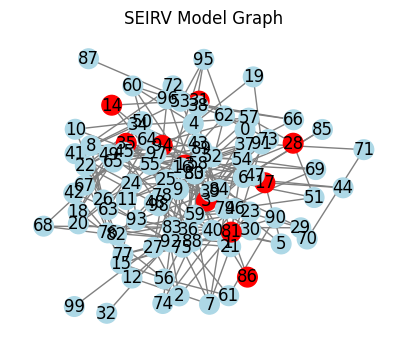

In [3]:
from src.webapp.views.seirv.components.SEIRVGraph import SEIRVGraph
import matplotlib.pyplot as plt
from test.models.seirv_model import SEIRVModel

num_nodes=100
avg_node_degree=4
initial_exposed_size=10
initial_infected_size=10
virus_spread_chance=0.2
virus_check_frequency=0.4
exposure_to_infection_chance=0.3
recovery_chance=0.3
gain_resistance_chance=0.3
seed=42
steps=50
vaccination_rate=0
vaccination_effectiveness=0
vaccination_strategy="random"

model = SEIRVModel(
        num_nodes=num_nodes,
        avg_node_degree=avg_node_degree,
        initial_exposed_size=initial_exposed_size,
        initial_infected_size=initial_infected_size,
        virus_spread_chance=virus_spread_chance,
        virus_check_frequency=virus_check_frequency,
        exposure_to_infection_chance=exposure_to_infection_chance,
        recovery_chance=recovery_chance,
        gain_resistance_chance=gain_resistance_chance,
        seed=seed,
        vaccination_rate=vaccination_rate,
        vaccination_effectiveness=vaccination_effectiveness,
        vaccination_strategy=vaccination_strategy
    )
graph_fig = SEIRVGraph.plot(model, layout="spring")
plt.show()
graph_fig.savefig("seirv_graph.png")

In [1]:
import mesa

print(f"mesa version {mesa.__version__}")

from mesa.visualization

mesa version 3.1.1
